In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

In [7]:
# 1. 데이터 생성하기

# ImageDataGenerator : 이미지에 임의 변형 및 정규화 적용을 한다.
# rescale: 원본 영상이 0~255의 RGB 계수로 구성되는데 이를 1/255로 스케일링하여
#  0~1 범위로 변환시켜준다.
train_datagen = ImageDataGenerator(rescale=1./255)

# flow_from_directory()를 통해 제너레이터 생성
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Colab Notebooks/handwriting_shape/train',
    # target_size : 이미지 크기를 지정하고 조절한다.
    target_size=(24, 24),
    # batch_size : 배치 크기를 지정한다.
    batch_size=3,
    # categorical: 2D one-hot 부호화된 라벨이 반환된다.
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/Colab Notebooks/handwriting_shape/test',
    target_size=(24, 24),
    batch_size=3,
    class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [0]:
# 2. 모델 구성하기
model = Sequential()
# 첫 번째 인자(32): 컨볼루션 필터의 수
model.add(Conv2D(32, 
                 # 두 번째 인자((3, 3)): 컨볼루션 커널의 (행, 열)
                 kernel_size=(3, 3),

                 # padding: 경계 처리 방법. 디폴트 값이 valid인데
                 #  valid는 유효한 영역만 출력한다. 따라서 출력 이미지 사이즈가 입력 이미지 사이즈보다 작다.

                 # activation: 활성화 함수. relu는 은닉층에 주로 쓰인다.
                 activation='relu',
                 # input_shape: 샘플 수를 제외한 입력 형태(행, 열, 채널수)
                 input_shape=(24, 24, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
# pool_size: 수직, 수평 축소 비율을 지정한다.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten: 이전 레이어의 2차원 출력 정보를 1차원 자료로 바꿔준다.
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

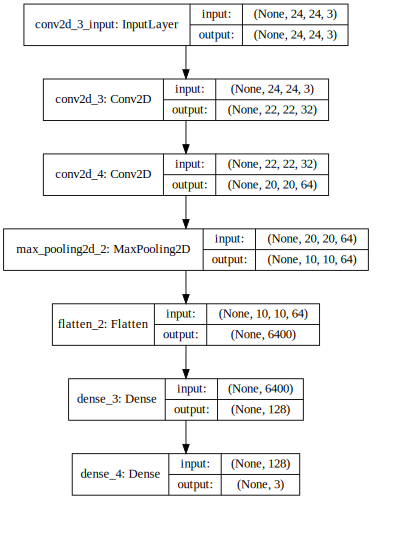

In [9]:
# 딥러닝 모델 가시화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [0]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# 4. 모델 학습시키기
hist = model.fit_generator(
    # 첫 번째 인자: 훈련 데이터셋을 제공할 제너레이터 지정
    train_generator,
    # steps_per_epoch: 한 epoch에 사용할 스텝 수를 지정
    steps_per_epoch=15,
    # epochs: 학습 반복 횟수
    epochs=50,
    # validation_data: 검증 데이터셋을 제공할 제너레이터 지정
    validation_data=test_generator,
    # validation_steps: 한 epoch 종료 시마다 검증할 때 사용되는 검증 스탭 수
    validation_steps=5)

Epoch 1/50
15/15 [==============================] - 0s 25ms/step - loss: 6.4108e-07 - accuracy: 1.0000 - val_loss: 1.5497e-06 - val_accuracy: 1.0000
Epoch 2/50
15/15 [==============================] - 0s 29ms/step - loss: 6.0399e-07 - accuracy: 1.0000 - val_loss: 3.8942e-06 - val_accuracy: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 24ms/step - loss: 5.5896e-07 - accuracy: 1.0000 - val_loss: 4.3313e-06 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 29ms/step - loss: 5.1657e-07 - accuracy: 1.0000 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 23ms/step - loss: 4.2650e-07 - accuracy: 1.0000 - val_loss: 0.2201 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 28ms/step - loss: 4.0266e-07 - accuracy: 1.0000 - val_loss: 3.7352e-06 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 24ms/step - loss: 3.6822e-07 - accuracy: 1.0000 - val_loss:

In [15]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


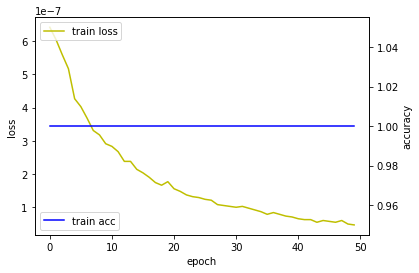

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
# loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
# acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

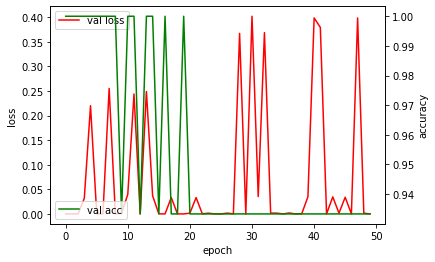

In [19]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

In [20]:
# 6. 모델 평가하기
print('-- Evaluate --')
scores = model.evaluate_generator(test_generator, steps=5)
print('%s: %.2f%%' %(model.metrics_names[1], scores[1] * 100))

-- Evaluate --
accuracy: 93.33%


In [21]:
# 7. 모델 사용하기
print('-- Predict --')
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: '{0:0.3f}' .format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.999 0.000 0.001]
 [1.000 0.000 0.000]
 [0.000 0.097 0.903]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.132 0.282 0.586]
 [0.000 0.000 1.000]
 [0.000 0.004 0.996]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]]


In [24]:
test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/Colab Notebooks/handwriting_shape/preview',
    target_size=(24, 24),
    batch_size=3,
    class_mode='categorical')

Found 30 images belonging to 1 classes.


In [25]:
print(test_generator.class_indices)

{'triangle': 0}


In [29]:
print('-- Predict --')
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: '{0:0.3f}' .format(x)})
print("{'circle': 0, 'rectangle': 1, 'triangle': 2}")
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 0.000 1.000]
 [0.001 0.000 0.999]
 [0.000 0.000 1.000]
 [0.000 0.002 0.998]
 [0.000 0.045 0.954]
 [0.014 0.128 0.858]
 [0.028 0.003 0.970]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.091 0.909]
 [0.001 0.001 0.998]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.007 0.000 0.993]]
